In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'

In [27]:
names = names.split(' ')

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/hypothyroid.csv',index_col=False,names=names,na_values=['?'])

In [29]:
df.head()

,response,age,sex,on_thyroxine,query_on_thyroxine,antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [30]:
to_drop=[]
for c in df.columns:
    if 'measured' in c or 'query' in c:
        to_drop.append(c)

In [31]:
to_drop

['query_on_thyroxine',
 'query_hypothyroid',
 'query_hyperthyroid',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [32]:
to_drop.append('TBG')

In [33]:
df.drop(to_drop,axis=1,inplace=True)

In [34]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2717.0,51.154214,19.294405,1.0,35.00,54.00,67.000,98.00
TSH,2695.0,5.923180,23.899467,0.0,0.00,0.70,2.300,530.00
T3,2468.0,1.939749,0.996773,0.0,1.40,1.80,2.300,10.20
TT4,2914.0,108.850000,45.485419,2.0,83.00,104.00,128.000,450.00
T4U,2915.0,0.978199,0.226580,0.0,0.85,0.96,1.065,2.21
FTI,2916.0,115.397771,60.239572,0.0,91.00,107.00,129.000,881.00


In [36]:
df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.shape

(2000, 16)

In [39]:
def class_convert(response):
    if response=='hypothyroid':
        return 1
    else:
        return 0

In [40]:
df['response']=df['response'].apply(class_convert)

In [41]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,1,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,1,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,1,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [42]:
df.columns

Index(['response', 'age', 'sex', 'on_thyroxine', 'antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

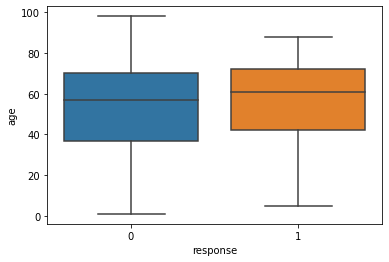

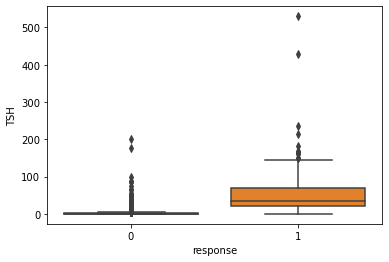

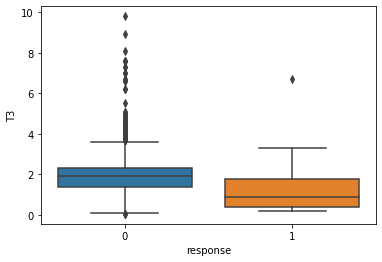

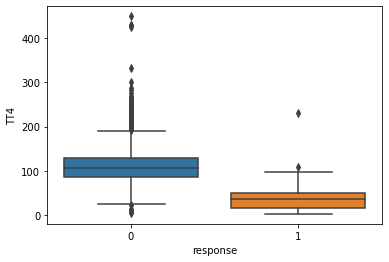

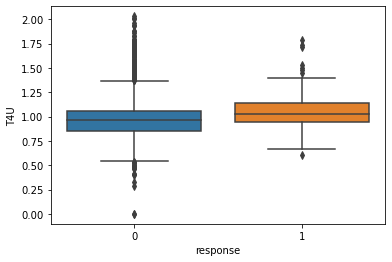

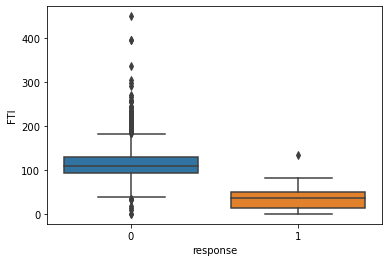

In [45]:
for var in ['age','TSH','T3','TT4','T4U','FTI']:
    sns.boxplot(x='response',y=var,data=df)
    plt.show()

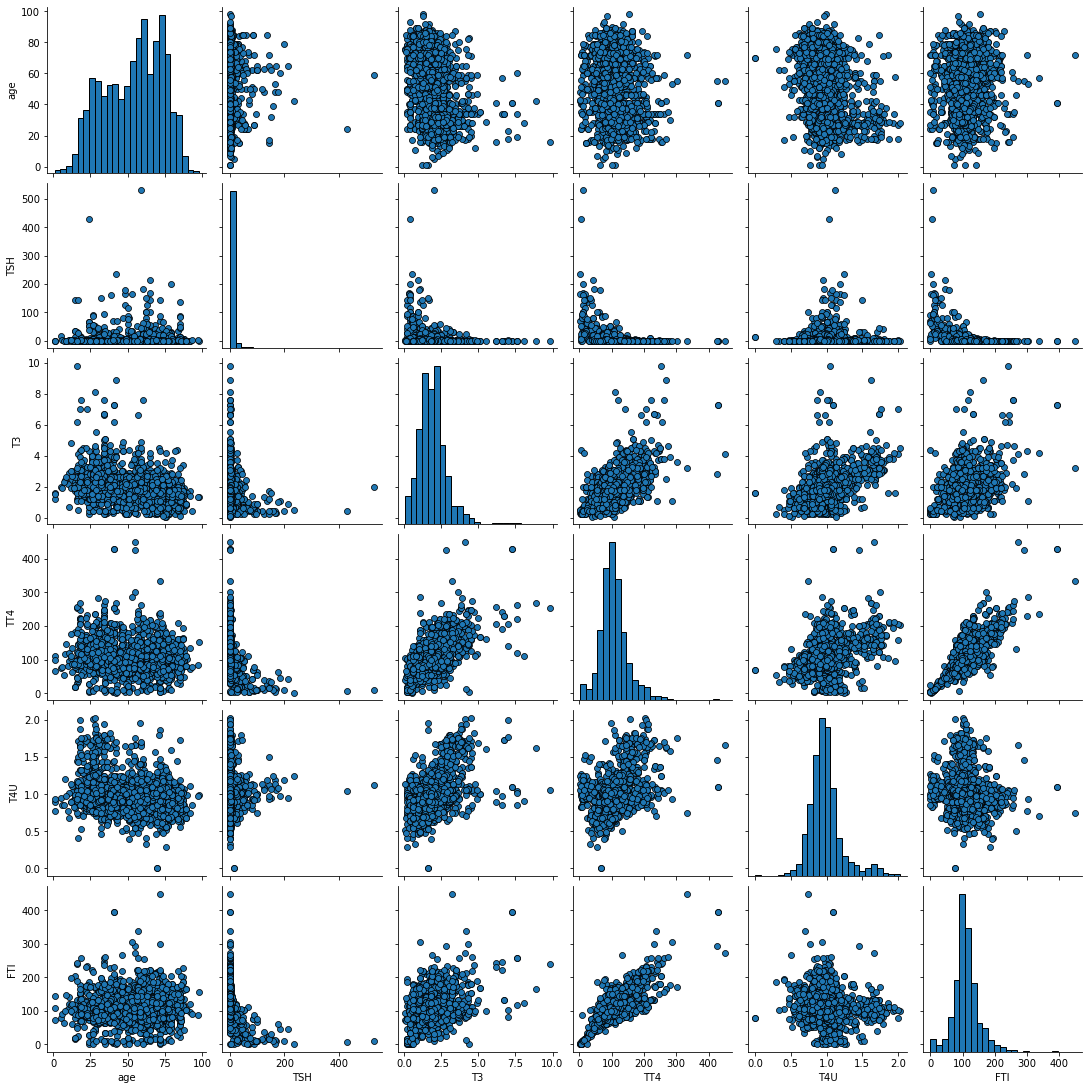

In [46]:
sns.pairplot(data=df[df.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

In [47]:
df_dummies = pd.get_dummies(data=df)

In [48]:
df_dummies.shape

(2000, 25)

In [49]:
df_dummies.sample(10)

,response,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,...,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
333,0,76.0,1.70,0.8,80.0,0.77,104.0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
2169,0,71.0,0.60,1.1,101.0,1.02,99.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
662,0,50.0,0.00,1.3,86.0,0.94,91.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1298,0,85.0,13.00,0.6,113.0,0.86,131.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2016,0,23.0,0.00,2.6,139.0,0.90,153.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1848,0,34.0,30.00,3.3,89.0,1.24,71.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
890,0,85.0,0.25,1.1,132.0,0.85,154.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
640,0,11.0,4.00,0.7,95.0,0.68,140.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
602,0,84.0,1.10,2.8,105.0,1.01,104.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
574,0,51.0,1.90,1.9,76.0,0.76,100.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('response',axis=1), 
                                                    df_dummies['response'], test_size=0.30, 
                                                    random_state=42)

In [51]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (1400, 24)
Test set shape (600, 24)


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf1 = LogisticRegression(penalty='l2',solver='newton-cg')

In [54]:
clf1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [55]:
clf1.intercept_

array([2.2850343])

In [56]:
clf1.coef_

array([[ 0.02031893,  0.01861482, -0.32521608,  0.00395535,  0.30699785,
        -0.10796205,  0.30204749, -0.30203664,  0.89773283, -0.89772198,
         0.62687893, -0.62686807, -0.67442687,  0.67443772,  0.13429236,
        -0.13428151,  0.27313187, -0.27312101,  0.26138874, -0.26137789,
         0.08933233, -0.08932148, -0.24898845,  0.2489993 ]])

In [57]:
clf1.score(X_test,y_test)

0.9816666666666667

In [58]:
prob_threshold = 0.5

In [59]:
prob_df=pd.DataFrame(clf1.predict_proba(X_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.990471,0.009529,0
1,0.998714,0.001286,0
2,0.999999,0.000001,0
3,0.624016,0.375984,0
4,0.999296,0.000704,0
5,0.864075,0.135925,0
6,0.983696,0.016304,0
7,0.998507,0.001493,0
8,0.221967,0.778033,1
9,0.999968,0.000032,0


In [60]:
y_test[:10]

2944    0
511     0
2116    0
1412    0
2039    0
2013    0
1478    0
2744    0
83      1
2100    0
Name: response, dtype: int64

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.86      0.77      0.81        31

    accuracy                           0.98       600
   macro avg       0.92      0.88      0.90       600
weighted avg       0.98      0.98      0.98       600



In [63]:
pd.DataFrame(confusion_matrix(y_test, clf1.predict(X_test)),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,565,4
NO,7,24


In [64]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [66]:
df_dummies.columns

Index(['response', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'antithyroid_medication_f',
       'antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t'],
      dtype='object')

In [67]:
formula = 'response ~ ' + '+'.join(df_dummies.columns[1:])

In [68]:
formula

'response ~ age+TSH+T3+TT4+T4U+FTI+sex_F+sex_M+on_thyroxine_f+on_thyroxine_t+antithyroid_medication_f+antithyroid_medication_t+thyroid_surgery_f+thyroid_surgery_t+pregnant_f+pregnant_t+sick_f+sick_t+tumor_f+tumor_t+lithium_f+lithium_t+goitre_f+goitre_t'

In [70]:
model = smf.glm(formula = formula, data=df_dummies, family=sm.families.Binomial())

In [71]:
result=model.fit()

In [72]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.59
Date:                Wed, 19 Aug 2020   Deviance:                       247.17
Time:                        17:49:01   Pearson chi2:                 9.10e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [73]:
result.predict(X_test[:10])

2944    2.408353e-03
511     6.250161e-04
2116    6.125699e-07
1412    3.274420e-01
2039    7.888963e-04
2013    1.325293e-01
1478    3.197375e-02
2744    1.098108e-03
83      8.650453e-01
2100    6.524129e-05
dtype: float64

In [74]:
y_pred=(result.predict(X_test)>prob_threshold).apply(int)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.89      0.77      0.83        31

    accuracy                           0.98       600
   macro avg       0.94      0.88      0.91       600
weighted avg       0.98      0.98      0.98       600



In [76]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,566,3
NO,7,24


In [77]:
formula = 'response ~ ' + '+'.join(df_dummies.columns[1:7])
formula

'response ~ age+TSH+T3+TT4+T4U+FTI'

In [78]:
model = smf.glm(formula = formula, data=df_dummies, family=sm.families.Binomial())
result=model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1993
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -131.55
Date:                Wed, 19 Aug 2020   Deviance:                       263.09
Time:                        17:49:58   Pearson chi2:                 5.65e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1596      1.995      2.085      0.0

In [79]:
y_pred=(result.predict(X_test)>prob_threshold).apply(int)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       573
           1       0.74      0.85      0.79        27

    accuracy                           0.98       600
   macro avg       0.87      0.92      0.89       600
weighted avg       0.98      0.98      0.98       600



In [80]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,565,4
NO,8,23


In [81]:
sklearn_prob = clf1.predict_proba(X_test)[...,1][:10]
statsmodels_prob =  result.predict(X_test[:10])

In [82]:
prob_comp_df=pd.DataFrame(data={'Scikit-learn Prob':list(sklearn_prob),'Statsmodels Prob':list(statsmodels_prob)})
prob_comp_df

,Scikit-learn Prob,Statsmodels Prob
0,0.009529,0.026742
1,0.001286,0.000780
2,0.000001,0.000001
3,0.375984,0.306287
4,0.000704,0.000797
5,0.135925,0.132377
6,0.016304,0.007412
7,0.001493,0.001065
8,0.778033,0.874865
9,0.000032,0.000161
